In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("C:\\Users\\Admin\\Downloads\\orange and apple.xlsx")

In [3]:
data

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [4]:
data.shape

(40, 3)

In [5]:
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
data.isnull().sum()

Weight    0
Size      0
Class     0
dtype: int64

In [8]:
data['Class'].value_counts()

orange    20
apple     20
Name: Class, dtype: int64

In [9]:
data.corr()

,Weight,Size
Weight,1.000000,0.765027
Size,0.765027,1.000000


# Feature Engineering

In [10]:
x=data.iloc[:,0:2].values # independent variable
y=data.iloc[:,2:3].values # dependent variable

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(32, 2) (32, 1) (8, 2) (8, 1)


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [14]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [15]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0])

In [16]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0])

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy of svm for the Given DataSet:",accuracy)


Accuracy of svm for the Given DataSet: 1.0


In [18]:
cm

array([[4, 0],
       [0, 4]], dtype=int64)

In [19]:
x_test

array([[69.  ,  4.61],
       [66.  ,  4.13],
       [71.  ,  5.35],
       [67.  ,  4.7 ],
       [73.  ,  5.79],
       [65.  ,  4.48],
       [74.  ,  5.25],
       [70.  ,  5.47]])

In [20]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0])

In [21]:
compare = {'y_test':y_test, 'y_predict':y_pred}
data= pd.DataFrame(compare, columns = ['y_test', 'y_predict'])
data

,y_test,y_predict
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0


In [22]:
pip install mlxtend

In [23]:
from mlxtend.plotting import plot_decision_regions

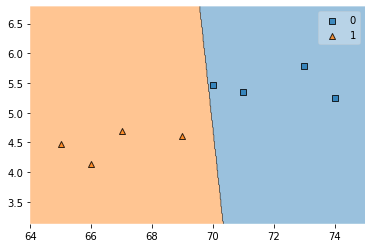

In [24]:
#plot decision boundary
plot_decision_regions(x_test,y_test,clf=classifier,legend=1)
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
#Grid Search  to find the value from kernel , c , gamma
parameters=[{'kernel':['rbf'], 'C':[1,10,100,1000,10000], 'gamma':[0.5, 0.1, 0.05,0.07,0.08]},
           {'kernel':['linear'],'gamma':[0.5, 0.1, 0.05,0.07,0.08], 'C':[1,10,100,1000,10000]}]

In [27]:
grid_model_svc=GridSearchCV(classifier,parameters)
grid_model_svc.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.5, 0.1, 0.05, 0.07, 0.08],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.5, 0.1, 0.05, 0.07, 0.08],
                          'kernel': ['linear']}])

In [28]:
grid_model_svc.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}